## Correcting for stationarity in time series

0: Download the data:

In [1]:
import quandl

QUANDL_KEY = '15L4ky9aN_bF_6uss8CA' # replace {key} with your own API key  
quandl.ApiConfig.api_key = QUANDL_KEY

df = quandl.get(dataset='WGC/GOLD_MONAVG_USD',
               start_date='2000-01-01', 
               end_date='2011-12-31')

df.rename(columns={'Value': 'price'}, inplace=True)
df = df.resample('M').last()

In [2]:
print(f'Shape of DataFrame: {df.shape}')
df.head()

Shape of DataFrame: (144, 1)


,price
Date,
2000-01-31,284.31
2000-02-29,299.86
2000-03-31,286.39
2000-04-30,279.69
2000-05-31,275.19


1. Import the libraries and update the inflation data:

In [3]:
pip install cpi

  Obtaining dependency information for cpi from https://files.pythonhosted.org/packages/72/32/6954802471d7ab1b3bdc648baf01e5acca698a66385054a33a8653720d11/cpi-1.1.4-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/31.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/31.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/31.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/31.7 MB 325.1 kB/s eta 0:01:38
   ---------------------------------------- 0.0/31.7 MB 325.1 kB/s eta 0:01:38
   ---------------------------------------- 0.0/31.7 MB 325.1 kB/s eta 0:01:38
   ---------------------------------------- 0.0/31.7 MB 325.1 kB/s eta 0:01:38
   ---------------------------------------- 0.0/31.7 MB 325.1 kB/s eta 0:01:38
   ---------------------------------------- 0.0/31.7 MB 103.4 kB/s eta 0:05:06
   ---------------------------------------- 0.0/31.7 MB 103.4 kB/s eta 0:05:06
   ---------------------------------------

   ------------------------------------- -- 29.4/31.7 MB 477.5 kB/s eta 0:00:05
   ------------------------------------- -- 29.4/31.7 MB 477.5 kB/s eta 0:00:05
   ------------------------------------- -- 29.4/31.7 MB 475.8 kB/s eta 0:00:05
   ------------------------------------- -- 29.5/31.7 MB 475.8 kB/s eta 0:00:05
   ------------------------------------- -- 29.5/31.7 MB 475.4 kB/s eta 0:00:05
   ------------------------------------- -- 29.5/31.7 MB 474.4 kB/s eta 0:00:05
   ------------------------------------- -- 29.5/31.7 MB 474.4 kB/s eta 0:00:05
   ------------------------------------- -- 29.6/31.7 MB 473.7 kB/s eta 0:00:05
   ------------------------------------- -- 29.6/31.7 MB 473.1 kB/s eta 0:00:05
   ------------------------------------- -- 29.6/31.7 MB 472.0 kB/s eta 0:00:05
   ------------------------------------- -- 29.6/31.7 MB 471.4 kB/s eta 0:00:05
   ------------------------------------- -- 29.6/31.7 MB 471.0 kB/s eta 0:00:05
   -------------------------------------

In [12]:
import cpi
import pandas as pd
from datetime import date
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from chapter_3_utils import test_autocorrelation

# update the CPI data (if needed)
# cpi.update()

2. Deflate the gold prices (to 2011-12-31 USD values) and plot the results:

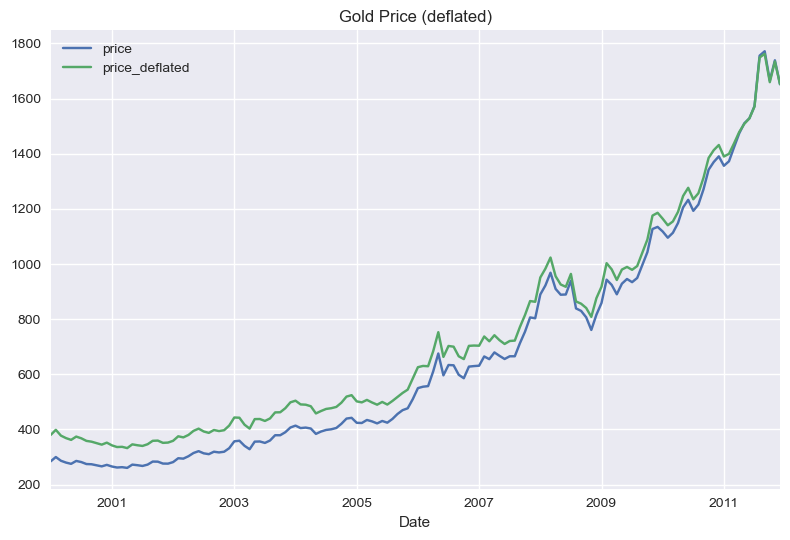

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

DEFL_DATE = date(2011, 12, 31)

df['dt_index'] = df.index.map(lambda x: x.to_pydatetime().date())
df['price_deflated'] = df.apply(lambda x: cpi.inflate(x.price,
                                                     x.dt_index, 
                                                     DEFL_DATE),
                               axis=1)
df[['price', 'price_deflated']].plot(title='Gold Price (deflated)')

plt.tight_layout()
plt.show()

3. Deflate the series using natural logarithm and plot it together with the rolling metrics:

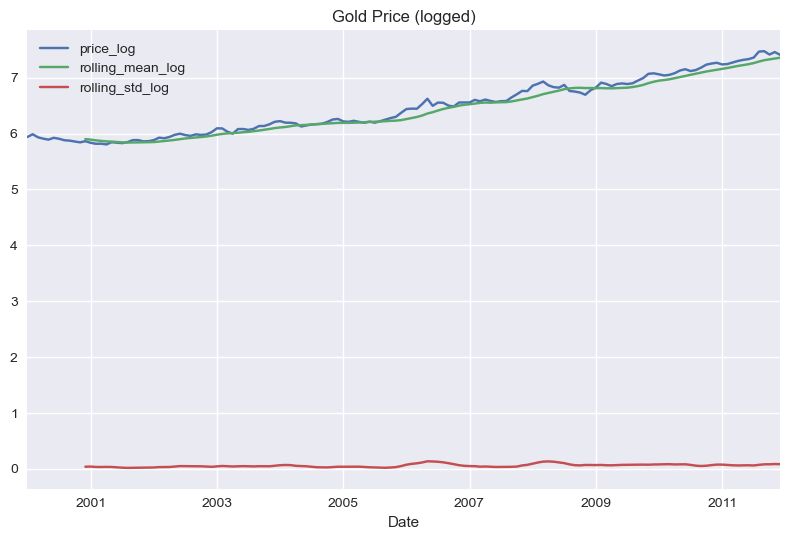

In [14]:
import numpy as np

WINDOW = 12
selected_columns = ['price_log', 'rolling_mean_log', 
                   'rolling_std_log']

df['price_log'] = np.log(df.price_deflated)
df['rolling_mean_log'] = df.price_log.rolling(WINDOW) \
    .mean()
df['rolling_std_log'] = df.price_log.rolling(WINDOW) \
    .std()

df[selected_columns].plot(title='Gold Price (logged)')

plt.tight_layout()
plt.show()

4. Use the `test_autocorrelation` (helper function for this chapter) to investigate if the series became stationary:

ADF test statistic: 0.89 (p-val: 0.99)
KPSS test statistic: 1.66 (p-val: 0.01)


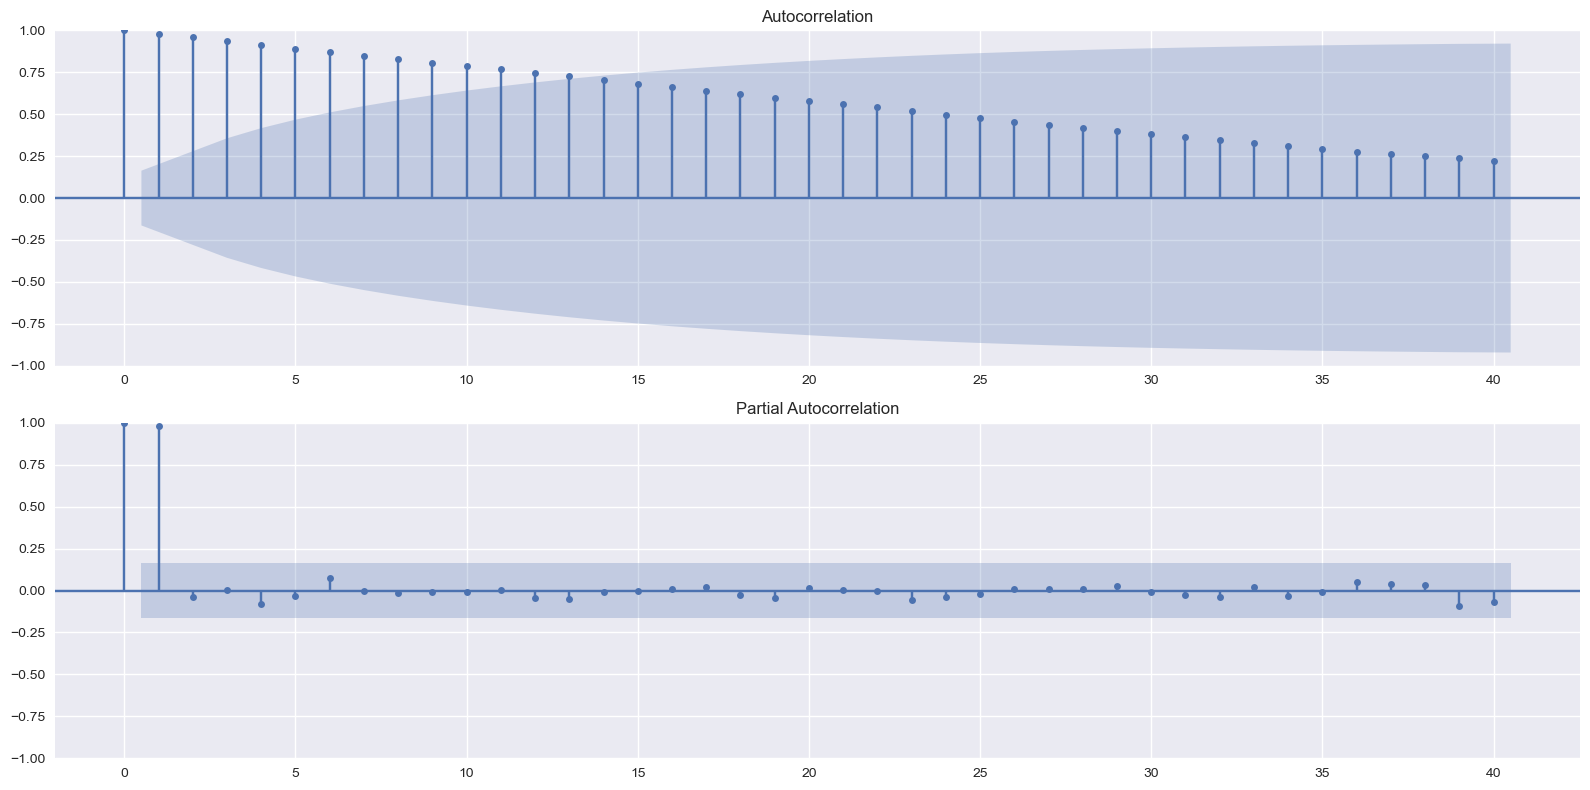

In [15]:
fig = test_autocorrelation(df.price_log)

plt.tight_layout()
plt.show()

5. Apply differencing to the series and plot the results:

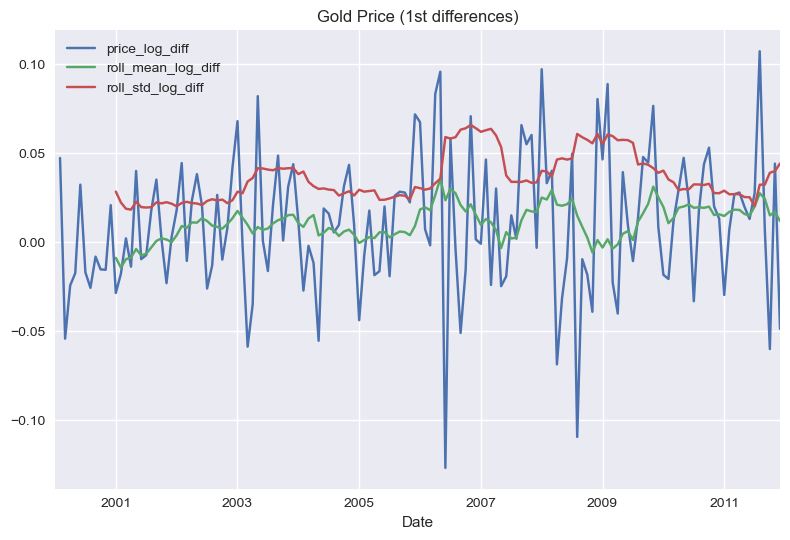

In [16]:
selected_columns = ['price_log_diff', 'roll_mean_log_diff', 
                   'roll_std_log_diff']

df['price_log_diff'] = df.price_log.diff(1)
df['roll_mean_log_diff'] = df.price_log_diff.rolling(WINDOW) \
    .mean()
df['roll_std_log_diff'] = df.price_log_diff.rolling(WINDOW) \
    .std()
df[selected_columns].plot(title='Gold Price (1st differences)')

plt.tight_layout()
plt.show()

6. Test if the series became stationary:

ADF test statistic: -9.13 (p-val: 0.00)
KPSS test statistic: 0.26 (p-val: 0.10)


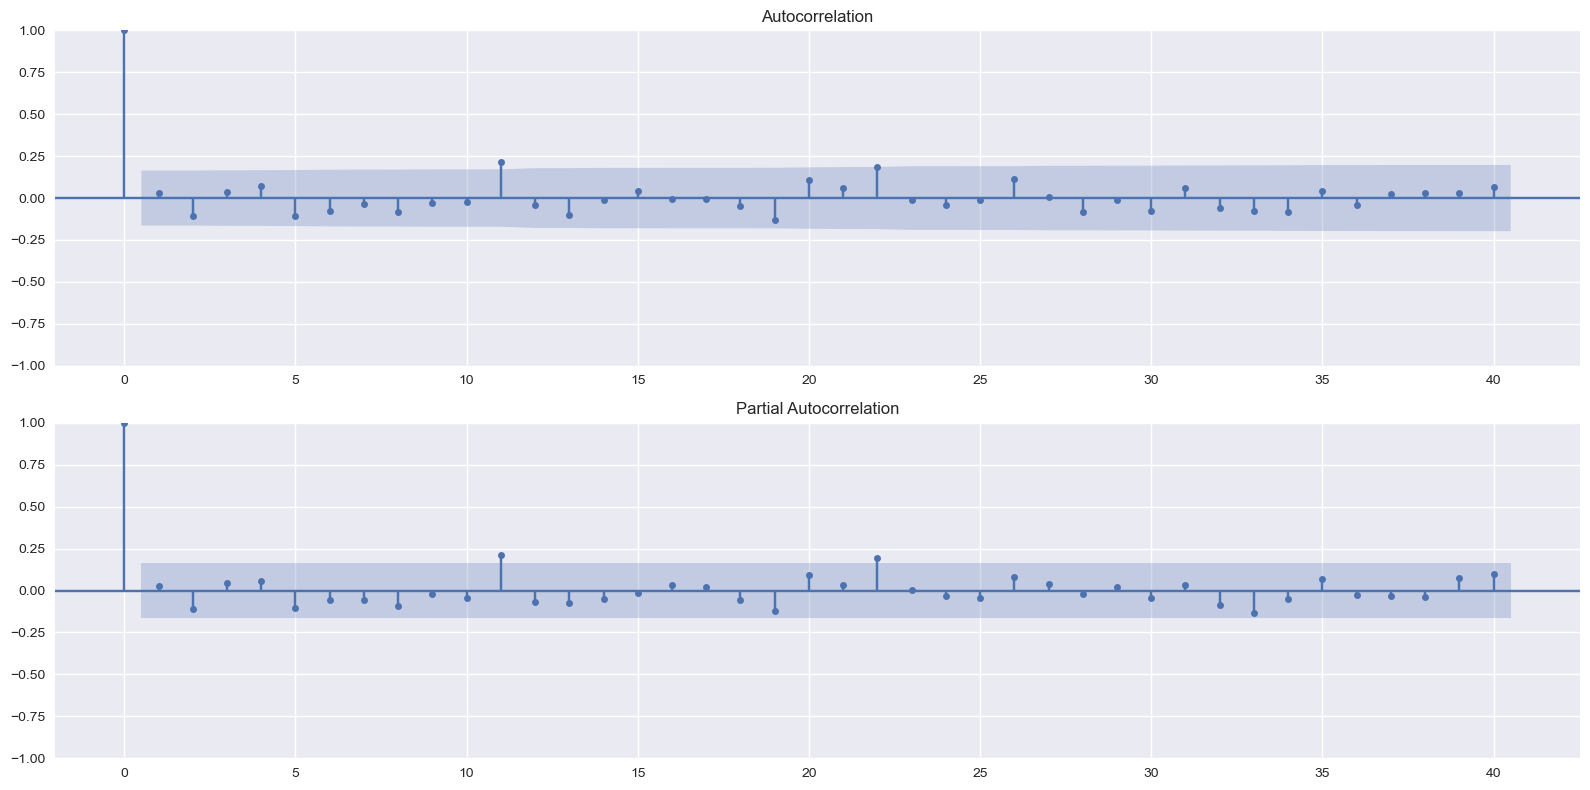

In [17]:
fig = test_autocorrelation(df.price_log_diff.dropna())

plt.tight_layout()
plt.show()